# CIS 545 Homework 5: Deep Learning with MXNet

### Due Monday, ***November 28, 11:59PM EST***

Welcome to CIS 5450 Homework 5! 

In this homework, we will learn more about the 'new electricity' - Deep Learning (We didn't coin this, Andrew Ng did) ! There are many cool frameworks for building deep learning models - PyTorch, Tensorflow, Theano, MxNet. Since you will be working with Big Data in this course, you need a framework that scales well. Almost all of these have a multi-gpu support built in, MxNet provides the easiest abstractions to do this and works well with AWS. In this assignment, we will be building neural networks in MxNet to solve an interesting problem.

Deep learning or neural network architectures have been used to solve a multitude of problems in various different fields like vision, natural language processing. So let's take a 'deep' dive into it.


![alt text](http://4.bp.blogspot.com/-sLgBLS3bJO8/U__Kx6PnkRI/AAAAAAAAAWM/Gz3cL5jiwTo/s320/godeeper.jpg)





## Why deep learning? 


*   It's coooool
*   Everyone is talking about is these days
*    Deep learning unlocks the treasure trove of unstructured big data for those with the imagination to use it
*   Deep learning models have great representational power and are 'universal approximators'


### Deep Learning Applications:


Deep learning has been significantly improved voice command systems (such as Siri and Alexa), as well as healthcare and image identification.

Deep learning has applications across numerous industries, which is why experts think that this technology is the future of almost everything. There are truly deep learning technologies such as Google’s very human-like talking AI, a new theory that cracks the 'black box' of deep learning, and various budding ideas like this one about why human forgetting might be the key to AI. Here are some cool applications of deep learning - 

Here's a neural network detecting anomalies in Chest Xrays :




![alt text](https://imgur.com/HKPzrzP.jpg)

Most humans can't tell that this is a case of Pleural Effusion {sounds like medical jargon to engineers like us} but this Neural Network model can detect it very well!

Mask RCNNs in action for detecting objects on the road aiding a self driving vehicle's driving: 
![alt text](https://miro.medium.com/max/3864/1*O4wsvh0CHWjP6IrK9HI_Zg.png)

Pretty cool, right? We will be appling CNNs to solve a cool image classification problem.


# Setup Jargon


## Penn Grader Setup
Make sure to initialize the grader with your 8 digit Penn ID.

In [1]:
%%capture
!pip3 install penngrader

from penngrader.grader import *

VERY IMPORTANT : Enter your **8 digit Penn ID** in the student id field below

PLEASE NOTE: There are some questions, for example making plots, that do not have test cases. All questions without an autograder attached will be manually graded. 

In [2]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO IN OUR BACKEND
STUDENT_ID = 10760059 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [3]:
grader = PennGrader(homework_id = 'CIS_5450O_Fall22_HW5', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 10760059

Make sure this correct or we will not be able to store your grade


## MxNet Installation

In [4]:
# Lists available GPUs - PLEASE MAKE SURE YOU HAVE A GPU LISTED BELOW 
# ex.: "GPU 0: Tesla T4 (UUID: GPU-11-xxxx...)" 
!nvidia-smi --list-gpus

GPU 0: Tesla T4 (UUID: GPU-0796ae55-3750-e1c9-aab2-3a1a3851a6fc)


In [5]:
%%capture
!pip3 install mxnet-cu112
!pip3 install --upgrade gluoncv

In [48]:
import mxnet as mx
from gluoncv.utils import viz
from mxnet.gluon.data import DataLoader
from mxnet.gluon.data.vision import transforms
from mxnet import np
import shutil
import os
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()
npx.num_gpus()

1

Downloading/Unzipping Dataset

In [8]:
!wget -nc https://storage.googleapis.com/penn-cis545/hw5_data.zip -O data.zip
!unzip -q "data.zip"

--2022-11-29 01:58:13--  https://storage.googleapis.com/penn-cis545/hw5_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13527975 (13M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  12.90M  9.33MB/s    in 1.4s    

2022-11-29 01:58:15 (9.33 MB/s) - ‘data.zip’ saved [13527975/13527975]



#Section 1: Traffic Sign Classification with MxNet

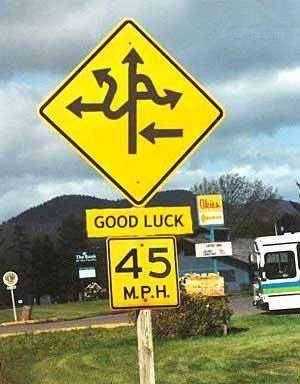

In this homework we will tackle one small subset of various problems in developing Autonomous Vehicle system. That is detecting the meaning of traffic signs!

The dataset we'll use is used for traffic sign classification problem. Multi-class image classification is a challenging problem in computer vision, especially when the number of classes is large. The two main difficulties with this specific problem is the subtle differences within label (different images of the same traffic sign) and across different labels. 

####[Differences within label]
For a single traffic sign there exists many variations. Some signs have yellow background colors while for others the background color could be white or blue. We need to train a model that recognizes that these differences are just variances in the label distribution and still predict correctly. 

####[Differences between label]
Traffic signs with small difference could have completely different meanings (ex - speed limit traffic signs). Our trained model should also be able to recognize these difference between labels to make accurate predictions.


The dataset contains 43 traffic sign labels. All images are in jpg format.



## 1.1.1 Summarizing our Dataset (5 points)

Getting a good sense of the dataset we are going to work on is always the first step you should take when implemening ML applications. 

Using the paths given (base_path, train_path, test_path)

1. Get the number of labels in training dataset and save as "train_num_labels" 

2. Create a dictionary "train_dataset_dict" that contains the labels as keys and the number of images inside the label as values.

Hint: Look up the documentation for os.walk, os.path.join, and next() functions. You might also find [this](https://stackoverflow.com/questions/10989005/do-i-understand-os-walk-right) helpful.




In [109]:
base_path = '/content/data_file_final'
train_path = os.path.join(base_path, 'train/')
test_path = os.path.join(base_path,'validation/')

# TODO - Number of labels for train dataset
count = 0
for curDir, dirs, files in os.walk(train_path):
  for dir in dirs: 
    count = count+1
train_num_labels = count 

# TODO - Creating dictionary for train dataset 
train_dataset_dict = {}

for curDir, dirs, files in os.walk(train_path):
  for dir in dirs: 
    count_file = 0
    for curDir1,dirs1,files1 in os.walk(os.path.join(train_path, dir)):
      for f in files1:
        count_file = count_file+1
    train_dataset_dict[dir] = count_file   

In [110]:
grader.grade('check_train_dataset', (train_num_labels, train_dataset_dict))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Implement the same procedure for the test dataset and save it to "test_num_labels" and "test_dataset_dict"

In [111]:
# TODO - Number of labels for test dataset
#test_num_labels = 
count = 0
for curDir, dirs, files in os.walk(test_path):
  for dir in dirs: 
    count = count+1
test_num_labels = count 



# TODO - Creating dictionary for test dataset 
test_dataset_dict = {}
for curDir, dirs, files in os.walk(test_path):
  for dir in dirs: 
    count_file = 0
    for curDir1,dirs1,files1 in os.walk(os.path.join(test_path, dir)):
      for f in files1:
        count_file = count_file+1
    test_dataset_dict[dir] = count_file 



In [112]:
grader.grade('check_test_dataset', (test_num_labels, test_dataset_dict))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.1.2 Dataset Distribution visualization (Train) (5 pts)

Create a seaborn barplot of the labels as well as the occurence of their frequencies of the train dataset. Add labels and titles and edit fontsize appropriately so the axis labels can be seen. This section will be manually graded.

(Don't worry about the visualibility of the each label names. Since this is a long barplot)

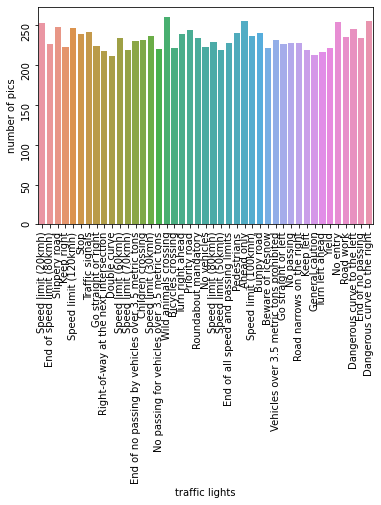

In [49]:
# TODO - Create Seaborn Barplot
#sns.barplot(x = train_dataset_dict.keys(), y = train_dataset_dict.values())
keys = list(train_dataset_dict.keys())
vals = list(train_dataset_dict.values())
ax = sns.barplot(x=keys, y=vals)
ax.set(xlabel = 'traffic lights', ylabel='number of pics')
ax.tick_params(rotation=90)

Does the class distribution look relatively uniform? If yes, we don't need to address class imbalance, if no, what should we do?

## 1.1.3 Build a dataset class (2pts)

Create train and test datasets for loading image files stored in a folder structure within train_path and test_path. Make sure that the image pixels  are floats in range [0,1] and not integers between [0,255] (Hint: transform parameter)

You should name your datasets train_dataset and test_dataset

Read about how you can do it [here](https://mxnet.apache.org/versions/1.0.0/api/python/gluon/data.html).

For the test case, index the ***205th*** image and get the labels for ***both*** train and test datasets and assign them to sample_train_label and sample_test_label, respectively. 

In [113]:
train_path = os.path.join(base_path, 'train/')
test_path = os.path.join(base_path,'validation/')

In [114]:
# TODO
train_dataset =mx.gluon.data.vision.datasets.ImageFolderDataset(train_path,flag=1,transform = lambda data, label: (data.astype(np.float32)/255,label))
test_dataset =mx.gluon.data.vision.datasets.ImageFolderDataset(test_path,flag=1,transform = lambda data, label: (data.astype(np.float32)/255,label))

In [115]:
# TODO - samples
sample_train_img, sample_train_label = train_dataset[205]
sample_test_img, sample_test_label = test_dataset[205]

In [116]:
grader.grade('check_datasets', [sample_train_label, sample_test_label])

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.1.3 Visualize images from the dataset (5 pts)

We have our training and testing datasets but we humans don't really understand binary that well. So let's visualize what our training data looks like by plotting some data points. 

Play around with how to access data from the dataset and then plot some of them (Hint: Look at plt.imshow()). This section will be manually graded, so be sure to give the images titles!

We have given you the sample_idxs which are indexs of the images you should visualize from the train_dataset you have implemented above.

Hint: You may need to convert the image data to a numpy ndarray() using asnumpy().

(-0.5, 31.5, 31.5, -0.5)

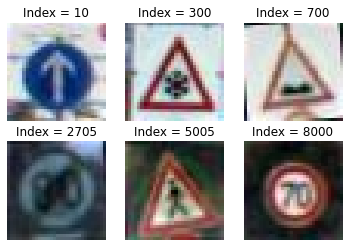

In [117]:
# TODO - Visualize 6 images in the dataset with their label using sample_idxs
%matplotlib inline 

import matplotlib.pyplot as plt

sample_idxs = [10, 300, 700, 2705, 5005, 8000]
#for index in sample_idxs:
#  sample_train_img_temp, sample_train_label_temp = train_dataset[index]
#  plt.imshow(sample_train_img_temp)
#  plt.title("index = "+ str(index))


fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
sample_img1, label1 = train_dataset[sample_idxs[0]]
sample_img2, label2 = train_dataset[sample_idxs[1]]
sample_img3, label3 = train_dataset[sample_idxs[2]]
sample_img4, label4 = train_dataset[sample_idxs[3]]
sample_img5, label5 = train_dataset[sample_idxs[4]]
sample_img6, label6 = train_dataset[sample_idxs[5]]


ax1.imshow(sample_img1.asnumpy())
ax1.set_title('Index = '+ str(sample_idxs[0]))
ax1.axis('off')
ax2.imshow(sample_img2.asnumpy())
ax2.set_title('Index = '+ str(sample_idxs[1]))
ax2.axis('off')
ax3.imshow(sample_img3.asnumpy())
ax3.set_title('Index = '+ str(sample_idxs[2]))
ax3.axis('off')
ax4.imshow(sample_img4.asnumpy())
ax4.set_title('Index = '+ str(sample_idxs[3]))
ax4.axis('off')
ax5.imshow(sample_img5.asnumpy())
ax5.set_title('Index = '+ str(sample_idxs[4]))
ax5.axis('off')
ax6.imshow(sample_img6.asnumpy())
ax6.set_title('Index = '+ str(sample_idxs[5]))
ax6.axis('off')


## 1.1.4 Create Dataloader objects (4 points)


Data loaders create data batches and perform transformations on the images. 

Write a transformation to resize the image to 32 x 32. You would also need to add a transformation to convert the image to a tensor - building blocks of neural network operations. Tensors are like numpy arrays with a gradient aspect. 

TLDR, in this section you will need to
 
*   Define a composition of transformations to first resize the image (to 32 x 32) and then convert to tensors
*   Next create train and test data loaders ("train_loader", "test_loader"), apply the transformations to the train and test datasets respectively. You will also need to pass in the batch size and whether or not you want to shuffle the data. 
*   Set shuffle = True for the train and False for the test set.
*   Use a batch size of 32 for the train loader and a batch size of 1 for the test set.

[Refer](https://mxnet.apache.org/api/python/docs/api/gluon/data/vision/transforms/index.html#mxnet.gluon.data.vision.transforms.Compose) to the transformation documentation


In [118]:
from mxnet.gluon.data import DataLoader

# TODO: Define the transformation and the train and test loaders
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])
train_loader = DataLoader(train_dataset.transform_first(transform), batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset.transform_first(transform), batch_size=1, shuffle=False)

In [119]:
# For grading

answer1 = None
shape_of_train_loader = None
for data, label in train_loader:
    answer1 = data.asnumpy().shape, label.asnumpy().shape
    shape_of_train_loader = data.asnumpy().shape
    break

answer2 = None
for data, label in test_loader:
    answer2 = data.asnumpy().shape, label.asnumpy().shape
    break

grader.grade('check_loaders', (answer1, answer2))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# 2.1 Let's build classifiers!

We have the data we need to train a scene classifier. We will start simple with a logistic regression classifier as a baseline for our performance before we move onto more complex neural networks. 

**Note**: For later subsections, you might find [this calculator](https://madebyollin.github.io/convnet-calculator/) helpful for computing the dimesions of CNN layers

## 2.1.1 Logical Logistic Regression - Baseline (20 points)

 Let's first try solving this problem with a Logistic Regression classifier solving the multiclass classification problem.

We will define a logistic regression model in Apache MxNet and train it on our training set and evaluate the performance on the test set

### Model Definition

We will define our first model in mxnet. Read up about gluon and autograd modules and how to use them to create layers in a neural network.

Our first model is a logistic regression model with the number of outputs equal to the number of classes in the model. Complete the construct net function with the logistic regression model definition

In [21]:
from mxnet import gluon, autograd, ndarray

def construct_net():
    net = mx.gluon.nn.Sequential()# TODO: Initialize a gluon sequential model
    with net.name_scope():
      #TODO: Add a gluon dense layer to the model
      net.add(nn.Dense(43))
    return net

net = construct_net()

# Set the context to use the available GPUs, otherwise just use a CPU
ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()
net.initialize(mx.init.Xavier(), ctx=ctx)

Now we need to initialize the model weights and the context, call the net initialize function with Xavier Initialization (sets your starting model weights, read more about it online if you are curious) also set the ctx variable with the context defined above

In [22]:
#net.initialize(mx.init.Xavier(), ctx=ctx)

Let's print the model summary

**Note**: Please make sure your layer in the print summary in the cell above starts with `sequential0_` instead of `sequential<some number that is not 0>_`. If you run the model definition cell multiple times, the mxnet will keep on adding layers. To avoid this, restart runtime and run again once.

In [23]:
x = mx.sym.var('data').as_np_ndarray()
sym = net(x)
mx.viz.print_summary(sym)

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential0_dense0_fwd(FullyConnected)                                      43          data                            
Total params: 43
________________________________________________________________________________________________________________________


The following test case might fail even if your have the correct parameters, restart runtime and check if you think you have the right paramters!

In [24]:
x = net(mx.nd.random.uniform(shape=shape_of_train_loader, ctx=ctx).as_np_ndarray())
grader.grade('check_log_reg_model', (x.shape, str(net.collect_params())))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


This is a multi-class classification problem, so we will use the *categorical cross-entropy* loss function. It is defined as:

$$L(y,\hat y)=-\sum_{j=0}^M\sum_{i=0}^{N}(y_{ij} log(\hat y_{ij}))$$

Luckily, we don't have to write it ourselves, we will use the implementation within Mxnet and Gluon.

Let's first define our criterion i.e. the loss function we want to optimize for.

Read more about gluon loss functions [here](https://mxnet.apache.org/api/python/docs/api/gluon/loss/index.html).

In [120]:
# TODO: Define a gluon Softmax Cross Entropy object, name this 'criterion', 
# the softmax indicates that the loss function does a softmax first to get the probabilities
# and then computes the Cross EntropyLoss
criterion = mx.gluon.loss.SoftmaxCrossEntropyLoss(axis=-1, sparse_label=True, from_logits=False, weight=None, batch_axis=0) #TODO

In [121]:
grader.grade('check_criterion', str(criterion))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Next, we define a trainer object, which includes an optimizer - we will use a stochastic gradient descent optimizer to optimize for our criterion and update our weights. 
We need 3 parameters while defining a gluon optimizer. 


1.   Trainable parameters in the model - net.collect_params() gives you all these parameters
2.   An optimizer - 'sgd' or 'adam', for this task, use the adaptive moment estimation algorithm aka 'adam'
3.   Optimizer params - A dictionary with parameters for your optimizer. We only need to specify the learning rate parameter within this dictionary.

The learning rate is a hyperparameter that you should train for. You should start with a small learning rate like 0.001.

Read more about the trainer object [here](https://mxnet.apache.org/api/python/docs/api/gluon/trainer.html).




In [122]:
trainer = mx.gluon.Trainer(params = net.collect_params(), optimizer = "adam", optimizer_params={'learning_rate': 0.001}) #TODO

### Train Model

Next, we need to iterate through our training data multiple times to optimize our weights. Each of the iterations is called an epoch. 

We will write a training loop now. Here is the pseudocode for the training loop: 

1. Define an [accuracy metric ](https://mxnet.apache.org/api/python/docs/api/metric/index.html) to measure performance.
1.   Repeat the following for a number of epochs
2.   Iterate through the mini batches in the training dataloader
3.   Each minibatch object will be a tuple (data, labels)
4.   Each minibatch has a number of images and a number of labels (batch size number of images and labels in each minibatch). Thus each data object will be of the shape (BATCH_SIZE, 3, 32, 32). The 3 corresponds to the number of channels - RGB and the labels array would be of size (BATCH_SIZE). Since our model requires linear inputs and not multiple channels, flatten the image in the batch. The reshape function will help you to do this.
5.   Send the data and label to the GPU. The 'as_in_context' with the ctx defined above will help you to do this.
6.   Compute the model outputs for the flattened data using the net object we previously defined.
7.   Compute the loss function with criterion we previously defined
8.   Compute the accuracy using the metric object we previously defined. Make sure it's reset for each epoch.
9.  Backpropogate through the computed loss value. This would compute the gradients for each of the model parameters.
10.  Use the trainer we previously defined to perform an optimizer step - this updates the weights based on the computed gradients with repect to the loss function.
11.  To see how your accuracy improves and the loss decreases, after each epoch print out the accuracy and the loss for that epoch. 


You should also plot your training accuracies and training loss function vs epochs. The plot is worth 5 points!


Train your logistic regression model for 10 epochs.

In [123]:
from mxnet import gluon, autograd, ndarray


#TODO: Define a training function which trains the passed network for the given number of epochs using the provided optimizer and criterion
# The function should return the final training loss and the final training accuracy
def train_network(net, train_loader, criterion, trainer, metric, epochs = 10):
    #TODO: Define your training loop here
    #################################################################
    for e in range(epochs):
      training_sample = 0
      cumulative_loss = mx.nd.zeros(1, ctx=ctx)
      for i, (data, label) in enumerate (train_loader):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)       
        data = data.reshape(-1, 3 * 32 * 32)
        with autograd.record(): 
          output = net(data)
          loss = criterion(output, label)
          metric.update(preds=output.as_nd_ndarray(), labels=label)     
          accuracy = metric.get()[1]  
        loss.backward()
        cumulative_loss = cumulative_loss + loss.sum().as_nd_ndarray()
        loss = cumulative_loss.asscalar()/training_sample
        training_sample = training_sample+data.shape[0]
        trainer.step(data.shape[0])
      losses.append(loss)
      accuracies.append(accuracy)
      print(f"echo:{e}, accuracy:{accuracy}, loss:{loss}")

    ############################################
    final_training_accuracy = accuracy #TODO: Set this to final training accuracy
    final_training_loss = loss #TODO: Set this to final training loss
    return final_training_accuracy, final_training_loss

losses = []
accuracies = []
epochs = 10
metric = mx.metric.Accuracy()
lr_training_accuracy, lr_training_loss = train_network(net, train_loader, criterion, trainer, metric, epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


echo:0, accuracy:0.7901419716056789, loss:0.8181930933243189
echo:1, accuracy:0.7964907018596281, loss:0.767891370333158
echo:2, accuracy:0.804372458841565, loss:0.724208978506235
echo:3, accuracy:0.8087382523495301, loss:0.6916819841433794
echo:4, accuracy:0.813997200559888, loss:0.6414798345321264
echo:5, accuracy:0.8195360927814437, loss:0.6100320082444411
echo:6, accuracy:0.824635072985403, loss:0.5787609785031049
echo:7, accuracy:0.8290716856628674, loss:0.5574263548239683
echo:8, accuracy:0.8334777488946655, loss:0.5260267502222306
echo:9, accuracy:0.8375624875024995, loss:0.4947712238018329


In [124]:
print("Logistic Regression - the training loss is ", str(lr_training_loss))
print("Logistic Regression - the training accuracy is ", str(lr_training_accuracy))

Logistic Regression - the training loss is  0.4947712238018329
Logistic Regression - the training accuracy is  0.8375624875024995


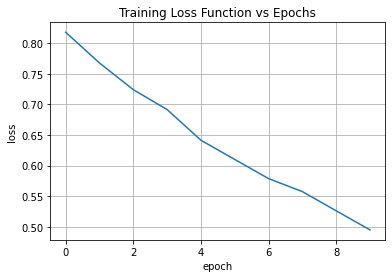

In [125]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss Function vs Epochs')
plt.grid()

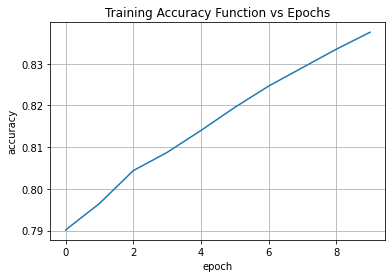

In [126]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training Accuracy Function vs Epochs')
plt.grid()

In [127]:
# Grader Cell : 5 Points
grader.grade('check_lr_train', (lr_training_accuracy, lr_training_loss))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Is your model learning? Is the loss decreasing? Is it able to classifiy better after training?




### Evaluate Model

Evaluate the model performance on the test set. Compute the cross entropy loss and accuracy on the test set.

Note:  Please don't report false numbers for the accuracy as we will be reviewing these manually and if if there is a manipulation with the accuracy computation, you will get a 0 for the entire section.


In [33]:
def test_model(net, criterion, test_loader, metric):

  #####################################################################
  for i, (data, label) in enumerate (test_loader):
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    data = data.reshape(-1, 3 * 32 * 32)
    with autograd.record(): 
      output = net(data) 
      loss = criterion(output, label)
      predictions = ndarray.argmax(output.as_nd_ndarray(), axis=1)
      metric.update(preds=predictions, labels=label)   
      accuracy_test = float(metric.get()[1])
    loss.backward()
    loss_test = ndarray.mean(loss.as_nd_ndarray()).asscalar() 

  #####################################################################
    #TODO
    testing_accuracy = float(accuracy_test) #TODO: Set this to final testing accuracy
    testing_loss = float(loss_test) #TODO: Set this to final testing loss
    return testing_loss, testing_accuracy



In [34]:
# metric  =  #TODO: Define an accuracy metric
metric = mx.metric.Accuracy()  
lr_testing_loss, lr_testing_accuracy = test_model(net, criterion, test_loader, metric)

print("Logistic Regression： the testing loss is ", str(lr_testing_loss))
print("Logistic Regression： the testing accuracy is ", str(lr_testing_accuracy))

Logistic Regression - the testing loss is  3.3012869358062744
Logistic Regression - the testing accuracy is  1.0


In [35]:
# Grader Cell : 5 Points
grader.grade('check_lr_test', (lr_testing_accuracy,lr_testing_loss))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Does the logistic regression fit well to the data? Think about whether this is underfitting or overfitting? Think about if we need more representational power or we need more regularization to make it better?

## 2.1.2 Feedforward Neural Networks (20 points)

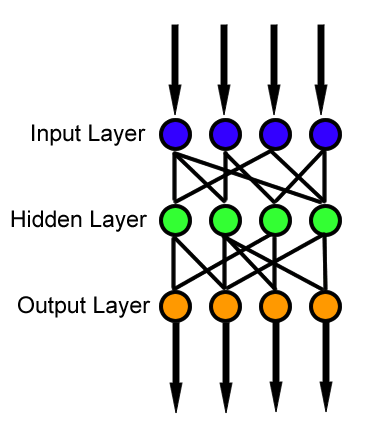

Since logistic regression isn't that great at fitting our classification problem, we need more representation power. We will now define a feedforward neural network


Complete the `create_ff_net` function below to define a feedforward neural network with at least 2 hidden layers. Note that the last layer must have the number of classes as the output size! You will also need to initialize the network, create a new `trainer` object with the parameters of the feedforward network. Use a ReLU activation function for the hidden layers. 


In [128]:
from mxnet import gluon, autograd, ndarray

def construct_ff_net():
    ff_net = mx.gluon.nn.Sequential()
    # TODO: Create a feedforward network, experiment with the number of hidden layers and the number of sizes of the hidden layers
    with ff_net.name_scope(): #300 - 600
      ff_net.add(gluon.nn.Dense(512, activation="relu"))
      ff_net.add(gluon.nn.Dense(512, activation="relu"))
      ff_net.add(gluon.nn.Dense(43))    
    return ff_net

ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()
net = construct_ff_net()
ff_net = net
#TODO: Initialize the network
ff_net.collect_params().initialize(mx.init.Xavier(), ctx=ctx)
trainer = mx.gluon.Trainer(ff_net.collect_params(), "adam", {'learning_rate': 0.0005}) #TODO: Create a new trainer object for this network

Print the model summary for the fully connected network.

In [129]:
x = mx.sym.var('data')
sym = ff_net(x.as_np_ndarray())
mx.viz.print_summary(sym)

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential4_dense0_fwd(FullyConnected)                                      512         data                            
________________________________________________________________________________________________________________________
sequential4_dense0_relu_fwd(Activation)                                     0           sequential4_dense0_fwd          
________________________________________________________________________________________________________________________
sequential4_dense1_fwd(FullyConn

Now train this network using the train network function defined above. Create plots for the training accuracy and training loss vs the number of epochs.


In [130]:
#TODO: Train the feedforward neural network on the training set using the train_network function

def train_network(net, train_loader, criterion, trainer, metric, epochs = 16):
    #TODO: Define your training loop here
    for e in range(epochs):
      cumulative_loss = mx.nd.zeros(1, ctx=ctx)
      training_sample = 0
      for i, (data, label) in enumerate (train_loader):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)       
        data = data.reshape(-1, 3 * 32 * 32)
        with autograd.record(): 
          output = net(data)
          loss = criterion(output, label)
          metric.update(preds=output.as_nd_ndarray(), labels=label)     
          accuracy = metric.get()[1]  
        loss.backward()
        cumulative_loss =cumulative_loss + loss.sum().as_nd_ndarray()
        loss = cumulative_loss.asscalar()/training_sample
        training_sample = training_sample + data.shape[0]
        trainer.step(data.shape[0])
      loss_sequence.append(loss)
      accuracy_sequence.append(accuracy)
      print(f"echo:{e}, accuracy:{accuracy}, loss:{loss}")
    final_training_accuracy = float(accuracy) 
    final_training_loss = float(loss) 
    return final_training_loss, final_training_accuracy

epochs = 16
loss_sequence = []
accuracy_sequence = []
metric = mx.metric.Accuracy()
train_loss, acc = train_network(ff_net, train_loader, criterion, trainer, metric, epochs)

ffn_training_loss, ffn_training_accuracy = train_loss, acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


echo:0, accuracy:0.0600879824035193, loss:3.6137237548828125
echo:1, accuracy:0.11497700459908018, loss:2.945508516751803
echo:2, accuracy:0.166999933346664, loss:2.5135237864958935
echo:3, accuracy:0.20993301339732054, loss:2.2129884377504005
echo:4, accuracy:0.2468506298740252, loss:2.021287575746194
echo:5, accuracy:0.2787109244817703, loss:1.8832014034955928
echo:6, accuracy:0.3060816408146942, loss:1.7744322556715746
echo:7, accuracy:0.3311337732453509, loss:1.676955785506811
echo:8, accuracy:0.3546401830744962, loss:1.5937264271271534
echo:9, accuracy:0.37560487902419515, loss:1.5159733112041767
echo:10, accuracy:0.3948483030666594, loss:1.4495155138847156
echo:11, accuracy:0.41280077317869757, loss:1.3801985520582933
echo:12, accuracy:0.42911417716456707, loss:1.326905764066256
echo:13, accuracy:0.444518239209301, loss:1.2733699113894732
echo:14, accuracy:0.4595947477171232, loss:1.218107174604367
echo:15, accuracy:0.4734365626874625, loss:1.1802912002954729


In [131]:
ffn_training_loss,ffn_training_accuracy

(1.1802912002954729, 0.4734365626874625)

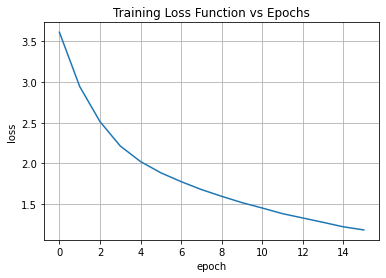

In [132]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(loss_sequence)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss Function vs Epochs')
plt.grid()

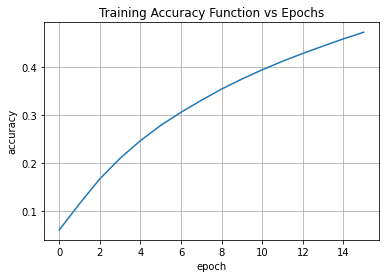

In [133]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(accuracy_sequence)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training Accuracy Function vs Epochs')
plt.grid()

In [134]:
grader.grade('check_ffn_train', (ffn_training_accuracy,ffn_training_loss))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Once again, evaluate the model performance on the test set. Compute the cross entropy loss and accuracy on the test set

In [135]:
# TODO: Compute performance on the test set using the test_network function created before

def test_model(net, criterion, test_loader, metric):
  for i, (data, label) in enumerate (test_loader):
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    data = data.reshape(-1, 3 * 32 * 32)
    with autograd.record(): 
      output = net(data)
      loss = criterion(output, label)
      predictions = ndarray.argmax(output.as_nd_ndarray(), axis=1)
      metric.update(preds=predictions, labels=label)     
      accuracy = float(metric.get()[1])  
    loss.backward()
    loss = ndarray.mean(loss.as_nd_ndarray()).asscalar()
  testing_accuracy = float(accuracy) 
  testing_loss = float(loss) 
  return testing_loss,testing_accuracy

metric = mx.metric.Accuracy() #TODO: Define an accuracy metric
ffn_testing_loss, ffn_testing_accuracy = test_model(ff_net, criterion, test_loader, metric)


In [136]:
ffn_testing_loss, ffn_testing_accuracy

(0.006439175456762314, 0.6067864271457086)

In [137]:
grader.grade('check_ffn_test', (ffn_testing_accuracy,ffn_testing_loss))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Does the feedforward network do better than logistic regression? Play around with the network architecture to see how it affects the performance on both the train and test data.


## 2.1.3 Convoluted Convolutional Neural Networks (25 points)
**So, what are CNNs?**

Convolutional Neural Networks are very similar to Feedforward Neural Networks from the previous section: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. 

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

If you wanna know more about how CNNs function and see some cool visualizations, we would highly recommend [this](http://cs231n.github.io/convolutional-networks/) page


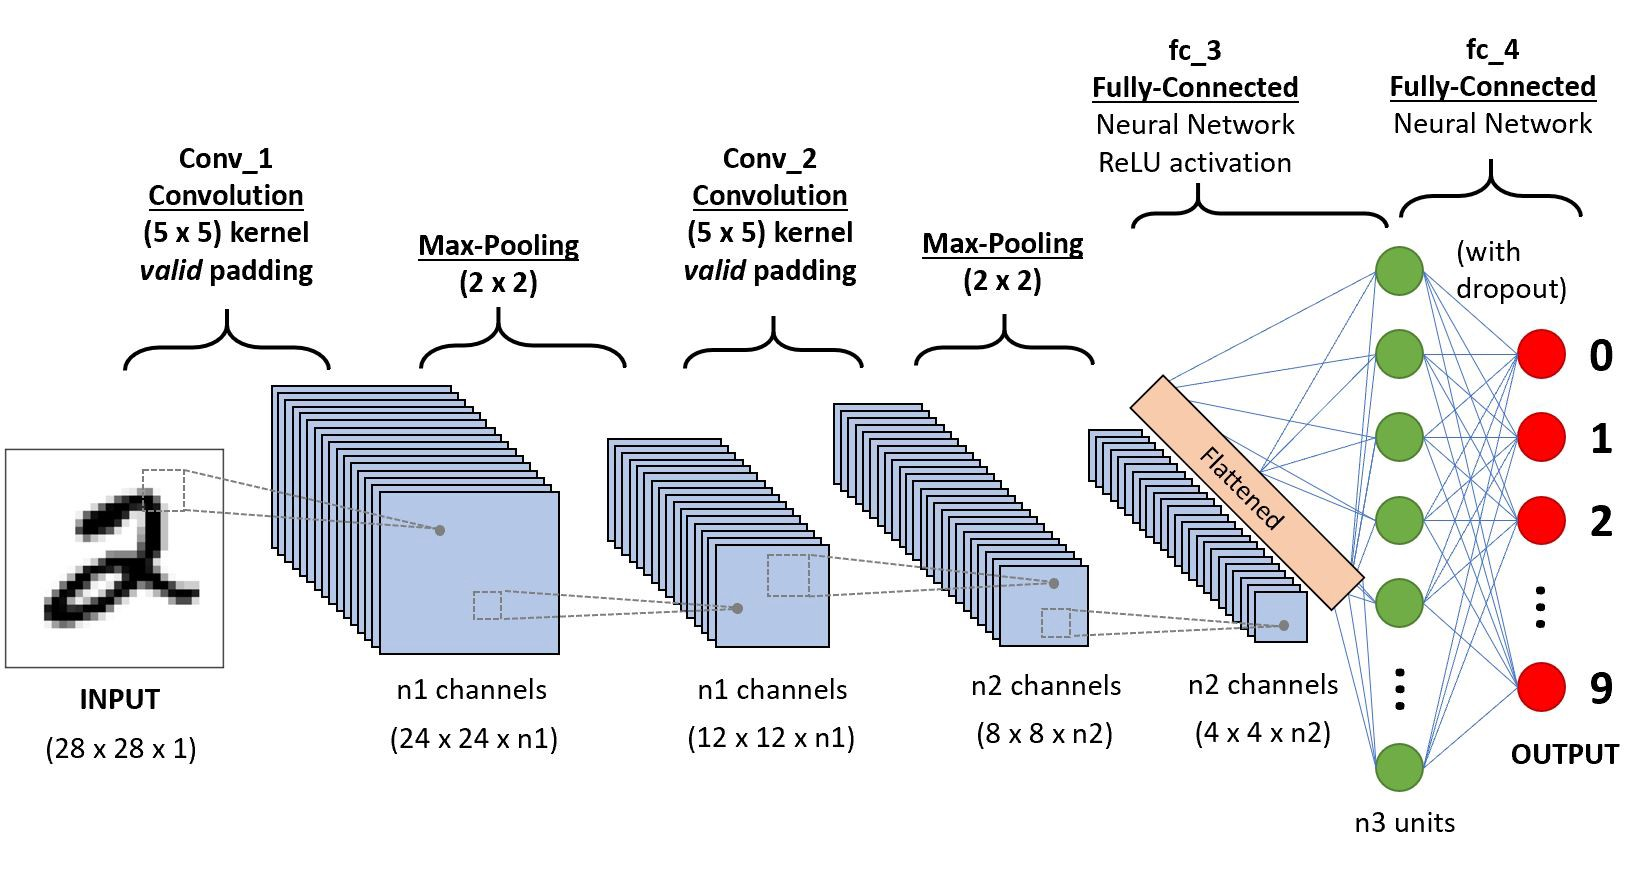


We will define the architecture for the CNN we will be using. The components of CNNs are: 


*   Convolutional Layers
*   Pooling Layers
*   Linear Layers
*   Activation Functions

Define a CNN model with Mxnet and Gluon with a convolutional layer followed by an activation function and a max pool, for one or more layers; then flatten the output from the convolutional layers and pass it through one or more fully connected or 'dense' layers and activation functions after all but the last layer. Note that the output shape from the last layer must be the same as the number of classes.

You can find some examples of this here: https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter03_deep-neural-networks/mlp-gluon.ipynb  
(scroll down to the section where it says “Faster modeling with gluon.nn.Sequential”)

Some possible activation functions are relu, sigmoid, tanh

In [138]:
import mxnet.ndarray as F

# TODO - construct construct_conv_net() function that returns the CNN network
from mxnet.gluon import nn
def construct_conv_net():
  cnn = mx.gluon.nn.Sequential()
  with cnn.name_scope():
    cnn.add(nn.Conv2D(128, kernel_size=(5,5)))
    cnn.add(nn.MaxPool2D(pool_size=(2,2), strides = (2,2)))
    cnn.add(nn.Conv2D(256, kernel_size=(5,5)))
    cnn.add(nn.MaxPool2D(pool_size=(2,2), strides = (2,2)))    
    cnn.add(nn.Conv2D(256, kernel_size=(3,3)))
    cnn.add(nn.MaxPool2D(pool_size=(2,2), strides = (2,2)))
    cnn.add(nn.Dense(512, activation = "tanh"))
    cnn.add(nn.Dense(128, activation = "tanh"))
    cnn.add(nn.Dense(64, activation = "tanh"))
    cnn.add(nn.Dense(43))
  return cnn




Once again, we ask you to create a network, initialize it and create a trainer for it.

Create a new trainer object "trainer" for this network with adam optimizer and learning rate of 0.0005



In [139]:
# Epochs
epochs = 25

# Accurcay Metric
metric = mx.metric.Accuracy()

# Set the context to use the available GPUs, otherwise just use a CPU
ctx = mx.gpu() if mx.context.num_gpus() else mx.cpu()

# Save the Network constructed above as cnn
cnn = construct_conv_net()
# Initialize network (cnn), initialize the criterion and the trainer
# TODO - Set up the criterion to train the model (remeber this is a multiclass classification problem)

criterion = gluon.loss.SoftmaxCrossEntropyLoss()
cnn.collect_params().initialize(mx.init.Xavier(), ctx=ctx)

# TODO: Initialize the network
# TODO: Create a new trainer object for this network
trainer = gluon.Trainer(cnn.collect_params(), 'adam', {'learning_rate': 0.0005})
print(str(cnn.collect_params()))
print(str(trainer.learning_rate))
print(str(trainer.optimizer))


sequential5_ (
  Parameter sequential5_conv0_weight (shape=(128, -1, 5, 5), dtype=<class 'numpy.float32'>)
  Parameter sequential5_conv0_bias (shape=(128,), dtype=<class 'numpy.float32'>)
  Parameter sequential5_conv1_weight (shape=(256, -1, 5, 5), dtype=<class 'numpy.float32'>)
  Parameter sequential5_conv1_bias (shape=(256,), dtype=<class 'numpy.float32'>)
  Parameter sequential5_conv2_weight (shape=(256, -1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter sequential5_conv2_bias (shape=(256,), dtype=<class 'numpy.float32'>)
  Parameter sequential5_dense0_weight (shape=(512, -1), dtype=float32)
  Parameter sequential5_dense0_bias (shape=(512,), dtype=float32)
  Parameter sequential5_dense1_weight (shape=(128, -1), dtype=float32)
  Parameter sequential5_dense1_bias (shape=(128,), dtype=float32)
  Parameter sequential5_dense2_weight (shape=(64, -1), dtype=float32)
  Parameter sequential5_dense2_bias (shape=(64,), dtype=float32)
  Parameter sequential5_dense3_weight (shape=(43, -1), dt

In [140]:
#Grader Cell - Worth 10 points
grader.grade('check_cnn_model', (str(cnn.collect_params()), str(trainer.learning_rate), str(trainer.optimizer)))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Write another function to train a convolutional neural network on the train 

data given the network, trainer and criterion. Train the CNN for 25 epochs. Plot the training loss and accuracy curves.

Note that there will be a slight difference from training a feedforward network cause here you will feed image information in separate channels as the input, rather than a single flattened input.

In [145]:
from mxnet import gluon, autograd, ndarray

#TODO: Define a training function which trains the passed network for the given number of epochs using the provided optimizer and criterion
# The function should return the final training loss and the final training accuracy
def train_cnn(net, train_loader, criterion, trainer, metric, epochs):
    #TODO: Define your training loop here
    for e in range(epochs):
      cumulative_loss = mx.nd.zeros(1, ctx=ctx)
      training_sample = 0
      for i, (data, label) in enumerate (train_loader):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)       
        with autograd.record(): 
          output = net(data)
          loss = criterion(output, label)
          metric.update(preds=output.as_nd_ndarray(), labels=label)     
          accuracy = metric.get()[1]  
        loss.backward()
        cumulative_loss =cumulative_loss + loss.sum().as_nd_ndarray()
        loss = cumulative_loss.asscalar()/training_sample
        training_sample = training_sample + data.shape[0]
        trainer.step(data.shape[0])
      loss_sequence.append(loss)
      accuracy_sequence.append(accuracy)
      print(f" echo:{e}, accuracy:{accuracy}, loss:{loss}")
    final_training_accuracy = float(accuracy)  #TODO: Set this to final training accuracy
    final_training_loss = float(loss)   #TODO: Set this to final testing accuracy
    return final_training_loss, final_training_accuracy

# TODO: get the training loss and accuracy

epochs = 25
loss_sequence = []
accuracy_sequence = []
cnn_training_loss, cnn_training_accuracy = train_cnn(cnn, train_loader, criterion, trainer, metric, epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


 echo:0, accuracy:0.11397720455908818, loss:3.352094210111178
 echo:1, accuracy:0.33193361327734455, loss:1.7039157182742388
 echo:2, accuracy:0.4667399853362661, loss:1.0101283146784856
 echo:3, accuracy:0.5598380323935213, loss:0.6725832132192758
 echo:4, accuracy:0.6258148370325934, loss:0.4667347149971204
 echo:5, accuracy:0.6754815703525962, loss:0.33357810974121094
 echo:6, accuracy:0.7142285828548576, loss:0.24284859192677033
 echo:7, accuracy:0.7453259348130374, loss:0.17408274381588668
 echo:8, accuracy:0.7706791974938345, loss:0.1280815540215908
 echo:9, accuracy:0.7916716656668666, loss:0.10251419360821064
 echo:10, accuracy:0.8094381123775245, loss:0.07111243712596405
 echo:11, accuracy:0.8241684996334067, loss:0.06852388381958008
 echo:12, accuracy:0.8369710673249965, loss:0.05023587667025053
 echo:13, accuracy:0.8476590396206473, loss:0.0606384460742657
 echo:14, accuracy:0.8575684863027394, loss:0.026531412051274225
 echo:15, accuracy:0.8660580383923215, loss:0.034006769

In [146]:
cnn_training_loss, cnn_training_accuracy

(0.0016532828792547567, 0.9133253349330134)

In [147]:
grader.grade('check_cnn_train', (cnn_training_accuracy, cnn_training_loss))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


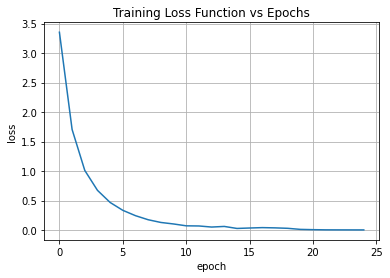

In [148]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(loss_sequence)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss Function vs Epochs')
plt.grid()

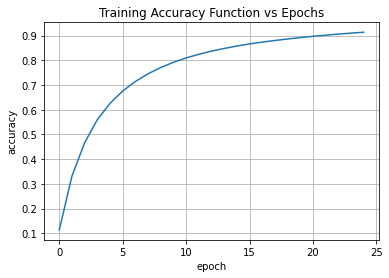

In [149]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(accuracy_sequence)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training Accuracy Function vs Epochs')
plt.grid()

Once again, evaluate the model performance on the test set. Compute the cross entropy loss and accuracy on the test set

In [150]:
# TODO: Compute performance on the test set
def test_model(net, criterion, test_loader, metric):
  for i, (data, label) in enumerate (test_loader):
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    with autograd.record(): 
      output = net(data)
      loss = criterion(output, label)
      predictions = ndarray.argmax(output.as_nd_ndarray(), axis=1)
      metric.update(preds=predictions, labels=label)     
      accuracy = float(metric.get()[1])  
    loss.backward()
    loss = ndarray.mean(loss.as_nd_ndarray()).asscalar()
  cnn_testing_accuracy = float(accuracy) 
  cnn_testing_loss = float(loss) 
  #p = predictions
  #o = output
  return cnn_testing_loss, cnn_testing_accuracy, #p, o

metric = mx.metric.Accuracy() #TODO: Define an accuracy metric

cnn_testing_loss, cnn_testing_accuracy = test_model(cnn, criterion, test_loader, metric)

In [151]:
cnn_testing_loss, cnn_testing_accuracy

(0.00017307691450696439, 0.9311377245508982)

In [152]:
grader.grade('check_cnn_test', (cnn_testing_accuracy, cnn_testing_loss))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


How does the CNN perform? Does it out perform feedforward network?

Print out the number of learned parameters for the CNN and for the FFN. Does the CNN have more parameters? Think about how this links to performance and how CNN is so powerful?

## 2.1.4 Confusion Matrix (6pts)

We want to give you some insight into how you can further analyze the performance of the classification model you have trained. 

Upto now we have only used accuracy as a measure of performance. Although accuracy is simple and widely used meaure, it has it's flaws.

Assume that we are trying to train a model to detect a rare disease from CT images of patients. For simplicity assume that this rare disease have 1% incidence rate.

In this situation, if we train a degenerative model which always predicts that the patient does not have the disease, the accuracy is very high, 99%! Obviously in this case accuracy is not a good measure of performance of the model.

This is where confusion matrix and related metrics are introduced.

So a confusion matrix is a C x C 2D matrix (Where C is number of labels of your dataset). Where the rows denote the actual labels and columns denote the predicted labels.

In (i, j)th element of the confusion matrix, it contains the number of data where it's actual label is i but the model predicted as label j.

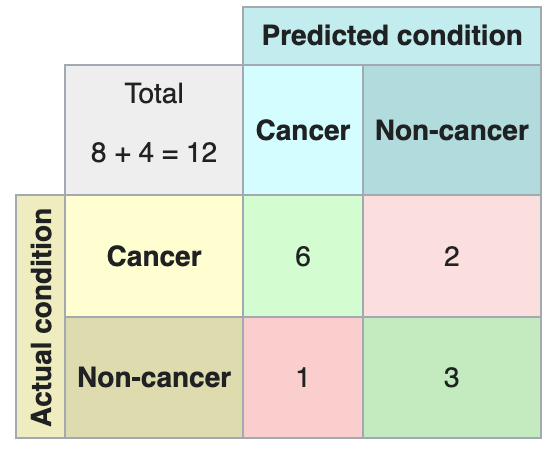

The provided image is an example of a confusion matrix for binary classification (C = 2), but you can easily imagine this scaling up to C > 2.

From this confusion matrix we can get all sorts of useful metrics such as False Positive Rate (FPR), False Negative Rate (FNR), Recall, Precision, etc... If you are interested in learning more about confusion matrix and related metrics [this wikipedia page](https://en.wikipedia.org/wiki/Confusion_matrix#cite_note-11) is a good place to look at. 







Create a confusion matrix for the test dataset using the CNN model you have trained above. And save the confusion matrix as a pandas dataframe called "confusion_matrix_df"

In [153]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
# TODO - create the confusion matrix and save it as pandas dataframe confusion_matrix_df
y_pred = []
y = []

for i, (data, label) in enumerate(test_loader): 
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    with autograd.record(): 
      output = cnn(data)
      predictions = ndarray.argmax(output.as_nd_ndarray(), axis=1)
    x1 = int(label.as_nd_ndarray().asscalar())
    x2 = int(predictions.as_nd_ndarray().asscalar())
    y.append(train_dataset.synsets[x1])
    y_pred.append(train_dataset.synsets[x2])

confusion_matrix_df = pd.DataFrame(confusion_matrix(y,y_pred, labels = train_dataset.synsets), columns = train_dataset.synsets,index = train_dataset.synsets)


In [157]:
confusion_matrix_df

,Ahead only,Beware of icesnow,Bicycles crossing,Bumpy road,Children crossing,Dangerous curve to the left,Dangerous curve to the right,Double curve,End of all speed and passing limits,End of no passing,...,Speed limit (60kmh),Speed limit (70kmh),Speed limit (80kmh),Stop,Traffic signals,Turn left ahead,Turn right ahead,Vehicles over 3.5 metric tons prohibited,Wild animals crossing,Yield
Ahead only,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beware of icesnow,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bicycles crossing,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bumpy road,0,0,1,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Children crossing,0,0,0,0,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dangerous curve to the left,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dangerous curve to the right,0,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Double curve,0,0,0,0,0,1,0,7,0,0,...,0,0,0,0,0,0,0,0,2,0
End of all speed and passing limits,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
End of no passing,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [158]:
grader.grade('check_confusion_matrix', (str(type(confusion_matrix_df)), confusion_matrix_df.shape, confusion_matrix_df.to_numpy().sum()))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Visualizing Confusion Matrix (3 pts)

Implement the code to visualize the confusion matrix you have created above. This section will be manually graded

Suggested library is using Seaborn heatmap. Take a look at the parameter "annot"

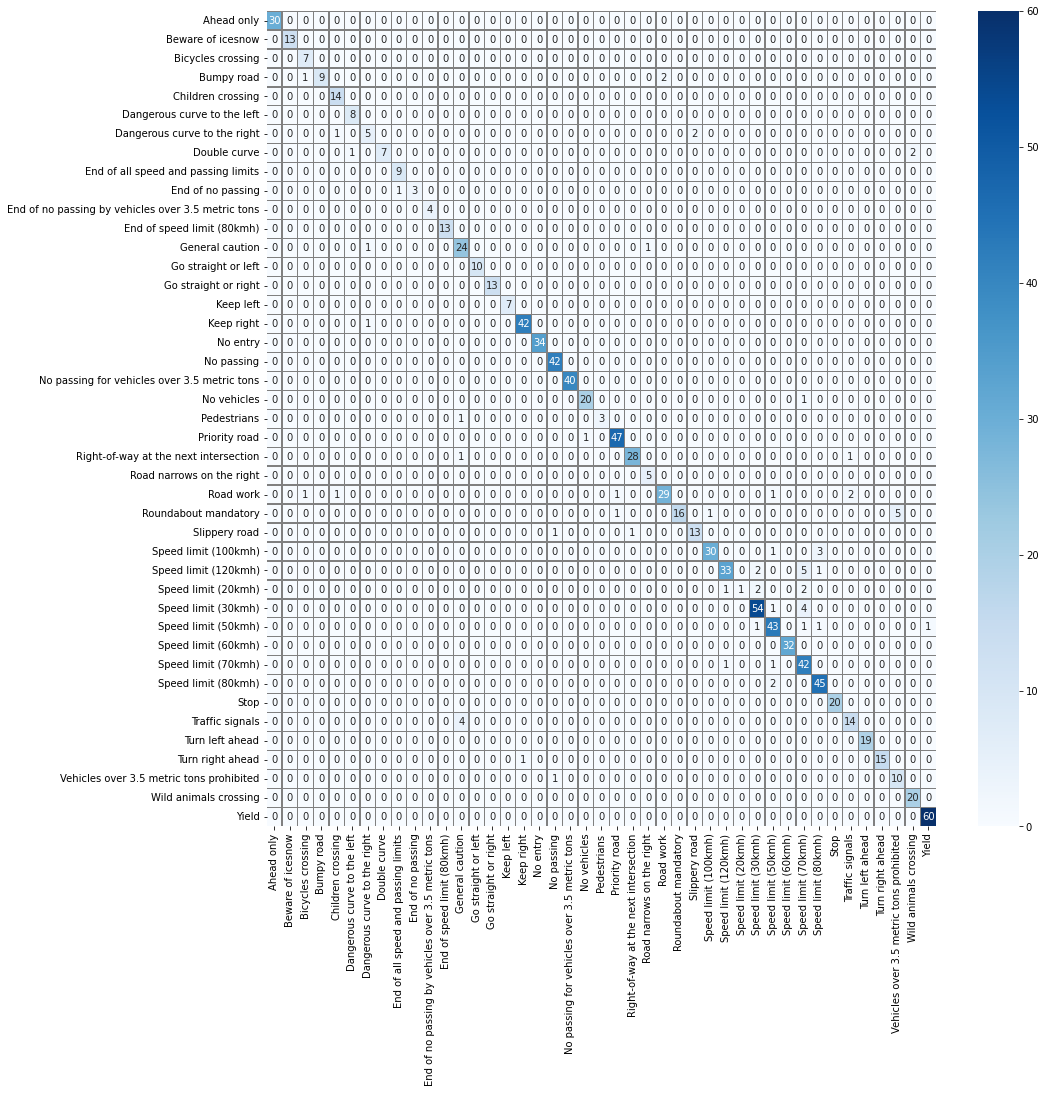

In [172]:
# TODO - create visualization of the Confusion Matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(data = confusion_matrix_df,linewidths=0.3,linecolor="grey",cmap="Blues",annot=True)

We can see that since our CNN model have relatively high accuracy, lots of diagonal elements have high values.

However, if we look closely, some of the diagonal elements have value zero. This means that the trained CNN model was unable to correctly classify any of the data with those labels. 

From here we might be able to figure out some potential reasons for this and make changes to the model architecture.

HW FINISHED! As always, submit *both* **homework5.ipynb** and **homework5.py** to Gradescope, and ensure that the files are named exactly as specified!